# Predicting the Sale Price of Bulldozers using Machine Learning 🚜 

In this notebook,we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.
>Since we're trying to predict a number, this kind of problem is known as a regression problem.

### What we'll end up with
Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.
To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.
>> <img src="image.png">
>6 Step Machine Learning Modelling Framework & Tools which can be used for each step of the machine learning modelling process.




## 1. Problem definition:
    How well can we predict the future sale price of a bulldozer, ginven its characteristics and previous examples of how much similar bulldozers have been sold for?
    
## 2. Data:
    The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

>The data for this competition is split into three parts:

* Train.csv - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).
* Valid.csv - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).
* Test.csv - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

## 3. Evaluation:
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
>For more information you can check https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation .

**NOTE:** The goal for most of the regression evaluation metrics is to minimize the error. For example,our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features:

Kaggle provides a data dictionary detailing all of the features of the dataset.( **File** : Data Dictionary.xlsx || **Location** : In data folder)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Importing training and validation sets
df=pd.read_csv("data/TrainAndValid.csv",low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

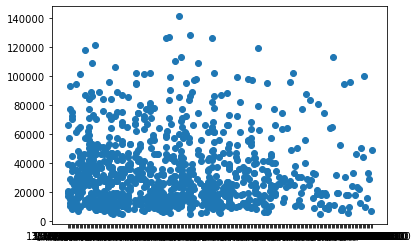

In [5]:
fig,ax= plt.subplots();
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [6]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [7]:
df.saledate.dtype

dtype('O')

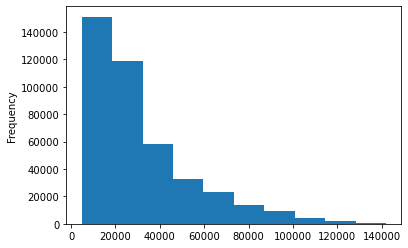

In [8]:
df.SalePrice.plot.hist();
#SalePrice is our target variable

## Parsing dates 

When we work with time series data,we want to enrich the time & date component as much as possible.

We ca do that by using `pandas`, which of the columns has dates in it using the `parse_dates` parameter.

>>>When working with time series data, it's a good idea to make sure any date data is the format of a datetime object (a Python data type which encodes specific information about dates).

In [9]:
#Importing data gaing but this time with parse dates
df=pd.read_csv("data/TrainAndValid.csv",
               low_memory=False,
              parse_dates=["saledate"])


In [10]:
df.saledate.dtype

dtype('<M8[ns]')

In [11]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

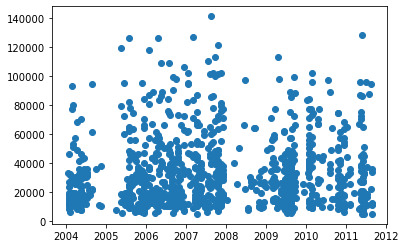

In [12]:
fig,ax= plt.subplots();
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [13]:
df.head(5)

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand   saledate  ... Undercarriage_Pad_Width  \
0                      68.0       Low 2006-11-16  ...                     NaN   
1                    4640.0       Low 2004-03-26  ...                     NaN   
2                    2838.0      High 2004-02-26  ...                     NaN   
3                    3486.0      High 2011-05-19  ...                     NaN   
4                     722.0    Medium 2009-07-23  ...                     NaN   

  Stick_Length Thumb Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0          NaN   NaN             NaN          NaN              NaN        NaN   
1          NaN   NaN             NaN          NaN              NaN        NaN   
2          NaN   NaN             NaN          NaN              NaN        NaN   
3          NaN   NaN             NaN          NaN              NaN        NaN   
4          NaN   NaN             NaN          NaN              NaN        NaN   

  Travel_Controls Differential_Type Steering_Controls  
0             NaN          Standard      Conventional  
1             NaN          Standard      Conventional  
2             NaN               NaN               NaN  
3             NaN               NaN               NaN  
4             NaN               NaN               NaN  

[5 rows x 53 columns]

In [14]:
#To see every column
df.head().T

0  \
SalesID                                                    1139246   
SalePrice                                                    66000   
MachineID                                                   999089   
ModelID                                                       3157   
datasource                                                     121   
auctioneerID                                                     3   
YearMade                                                      2004   
MachineHoursCurrentMeter                                        68   
UsageBand                                                      Low   
saledate                                       2006-11-16 00:00:00   
fiModelDesc                                                   521D   
fiBaseModel                                                    521   
fiSecondaryDesc                                                  D   
fiModelSeries                                                  NaN   
fiModelDescriptor                                              NaN   
ProductSize                                                    NaN   
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower   
state                                                      Alabama   
ProductGroup                                                    WL   
ProductGroupDesc                                      Wheel Loader   
Drive_System                                                   NaN   
Enclosure                                               EROPS w AC   
Forks                                          None or Unspecified   
Pad_Type                                                       NaN   
Ride_Control                                   None or Unspecified   
Stick                                                          NaN   
Transmission                                                   NaN   
Turbocharged                                                   NaN   
Blade_Extension                                                NaN   
Blade_Width                                                    NaN   
Enclosure_Type                                                 NaN   
Engine_Horsepower                                              NaN   
Hydraulics                                                 2 Valve   
Pushblock                                                      NaN   
Ripper                                                         NaN   
Scarifier                                                      NaN   
Tip_Control                                                    NaN   
Tire_Size                                      None or Unspecified   
Coupler                                        None or Unspecified   
Coupler_System                                                 NaN   
Grouser_Tracks                                                 NaN   
Hydraulics_Flow                                                NaN   
Track_Type                                                     NaN   
Undercarriage_Pad_Width                                        NaN   
Stick_Length                                                   NaN   
Thumb                                                          NaN   
Pattern_Changer                                                NaN   
Grouser_Type                                                   NaN   
Backhoe_Mounting                                               NaN   
Blade_Type                                                     NaN   
Travel_Controls                                                NaN   
Differential_Type                                         Standard   
Steering_Controls                                     Conventional   

                                                                 1  \
SalesID                                                    1139248   
SalePrice                                                    57000   
MachineID                                                   117657   
Mode

In [15]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sorting  DataFrame by saledate

when working with times series data,it's a good idea to sort it by date.

In [16]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Make a copy of the original DataFrame

*We make a copy of the original dataframe so when we manipulate the copy , we've still got our original data.*

In [17]:
#Make a copy 
df_temp=df.copy()

In [18]:
df_temp

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
205615  1646770     9500.0    1126363     8434         132          18.0   
274835  1821514    14000.0    1194089    10150         132          99.0   
141296  1505138    50000.0    1473654     4139         132          99.0   
212552  1671174    16000.0    1327630     8591         132          99.0   
62755   1329056    22000.0    1336053     4089         132          99.0   
...         ...        ...        ...      ...         ...           ...   
410879  6302984    16000.0    1915521     5266         149          99.0   
412476  6324811     6000.0    1919104    19330         149          99.0   
411927  6313029    16000.0    1918416    17244         149          99.0   
407124  6266251    55000.0     509560     3357         149          99.0   
409203  6283635    34000.0    1869284     4701         149          99.0   

        YearMade  MachineHoursCurrentMeter UsageBand   saledate  ...  \
205615      1974                       NaN       NaN 1989-01-17  ...   
274835      1980                       NaN       NaN 1989-01-31  ...   
141296      1978                       NaN       NaN 1989-01-31  ...   
212552      1980                       NaN       NaN 1989-01-31  ...   
62755       1984                       NaN       NaN 1989-01-31  ...   
...          ...                       ...       ...        ...  ...   
410879      2001                       NaN       NaN 2012-04-28  ...   
412476      2004                       NaN       NaN 2012-04-28  ...   
411927      2004                       NaN       NaN 2012-04-28  ...   
407124      1993                       NaN       NaN 2012-04-28  ...   
409203      1000                       NaN       NaN 2012-04-28  ...   

       Undercarriage_Pad_Width Stick_Length Thumb Pattern_Changer  \
205615                     NaN          NaN   NaN             NaN   
274835                     NaN          NaN   NaN             NaN   
141296                     NaN          NaN   NaN             NaN   
212552                     NaN          NaN   NaN             NaN   
62755                      NaN          NaN   NaN             NaN   
...                        ...          ...   ...             ...   
410879                     NaN          NaN   NaN             NaN   
412476                     NaN          NaN   NaN             NaN   
411927                     NaN          NaN   NaN             NaN   
407124                     NaN          NaN   NaN             NaN   
409203                     NaN          NaN   NaN             NaN   

       Grouser_Type     Backhoe_Mounting Blade_Type      Travel_Controls  \
205615          NaN  None or Unspecified   Straight  None or Unspecified   
274835          NaN                  NaN        NaN                  NaN   
141296          NaN  None or Unspecified   Straight  None or Unspecified   
212552          NaN                  NaN        NaN                  NaN   
62755           NaN  None or Unspecified        PAT                Lever   
...             ...                  ...        ...                  ...   
410879          NaN  None or Unspecified        PAT  None or Unspecified   
412476          NaN                  NaN        NaN                  NaN   
411927          NaN                  NaN        NaN                  NaN   
407124          NaN                  NaN        NaN                  NaN   
409203          NaN                  NaN        NaN                  NaN   

       Differential_Type Steering_Controls  
205615               NaN               NaN  
274835          Standard      Conventional  
141296               NaN               NaN  
212552          Standard      Conventional  
62755                NaN               NaN  
...                  ...               ...  
410879               NaN               NaN  
412476               NaN               NaN  
411927               NaN               NaN  
407124               NaN              

In [19]:
df_temp.head().T

205615  \
SalesID                                                             1646770   
SalePrice                                                              9500   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                             18   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
saledate                                                1989-01-17 00:00:00   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                         

## Add datetime parameters for `saledate` column

In [20]:
df_temp[:1].saledate.dt.year
#dt=datetime in pandas

205615    1989
Name: saledate, dtype: int64

In [21]:
df_temp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int64

In [22]:
df_temp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [23]:
df_temp["saleYear"]=df_temp.saledate.dt.year
df_temp["saleMonth"]=df_temp.saledate.dt.month
df_temp["saleDay"]=df_temp.saledate.dt.day
df_temp["saleDayOfWeek"]=df_temp.saledate.dt.dayofweek
df_temp["saleDayofYear"]=df_temp.saledate.dt.dayofyear

In [24]:
df_temp.head(5).T


205615  \
SalesID                                                             1646770   
SalePrice                                                              9500   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                             18   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
saledate                                                1989-01-17 00:00:00   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                         

In [25]:
#As we separated saledate column into day,month and year column (day time features)...
#so now we don't need saledate column
df_temp.drop("saledate",axis=1,inplace=True)

In [26]:
#Check the values of different columns
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

# Modelling

we've done enough EDA but let's start to do some model-driven EDA.

In [27]:
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)

#n_jobs=-1 => all columns
#random_state=42 => np.random(seed=42)

model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

#X = df_temp.drop("SalePrice",axis=1)
#Y=df_temp["SalePrice"]

ValueError: could not convert string to float: 'Low'

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 1

In [29]:
df_temp["UsageBand"].dtype

dtype('O')

**== object type**

In [30]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

 **Plus we have got so many missing values**
 
 
 
 So data is not numeric 

## Turning Data into numbers
(by converting them into pandas categories)


### Convert string to categories

One way we can turn all of data into numbers is by converting them into pandas categories

>To do this we can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality">Pandas types API</a> which allows us to interact and manipulate the types of data.

In [31]:
df_temp.head().T

205615  \
SalesID                                                             1646770   
SalePrice                                                              9500   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                             18   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                                         None or Unspecified   
Differential_Type                       

In [32]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])
#This is for :is there columns which has string type 

True

In [33]:
#Find the columns which contain strings
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
#items() treats every data as dictionary 

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [34]:
#Another example for getting clear idea what df.items() does:
random_dict={"key1":"hello",
            "key2": "world!"}

for key,value in random_dict.items():
    print(f"This is a key : {key}",
         f"This is a value: {value}")


This is a key : key1 This is a value: hello
This is a key : key2 This is a value: world!


In [35]:
#Now we will turn all of the string value into category values 
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [36]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [37]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [38]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [39]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

>We now have way to access all of our data in the form of numbers.

>But we still have a bunch of missing data...

In [40]:
#Check missing data
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data

In [41]:
#Export current temp dataframe
df_temp.to_csv("data/train_temp.csv",
              index=False)

In [42]:
#Import preprocessed data
df_temp=pd.read_csv("data/train_temp.csv",
                   low_memory=False)

In [43]:
df_temp.head().T

0  \
SalesID                                                             1646770   
SalePrice                                                              9500   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                             18   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                                         None or Unspecified   
Differential_Type                            

In [44]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Filling missing values :

### Fill numerical missing value first:

In [45]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayofYear


In [46]:
df_temp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [47]:
#Check for which numeric columnd have null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [48]:
# Fill the numeric rows with the median
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():  
            #add a binary column which tells us if the data was missing or not  
            df_temp[label+"_is_missing"]= pd.isnull(content)
            #Fill missing numeric values with median
            df_temp[label]=content.fillna(content.median())
#here _is_missing is the column which tells us that we filled that null value but originally that was with null value
#therefore we are keeping that information that originally that was with null value


>> Using median as Median is more robust than mean

In [49]:
#Proof of how median is more robust than mean
hundreds=np.full((1000,),100)
hundreds_billion=np.append(hundreds,1000000000)
np.mean(hundreds),np.mean(hundreds_billion),np.median(hundreds),np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

>> This proves that Median is more robust than mean

In [50]:
len(df_temp)

412698

In [51]:
#Check if there's any null numeric values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

>This prints nothing so all columns are filled and there is no null value

In [52]:
# check to see how many examples were missing =label_is_missing columns
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

This means, we filled 20136 values in auctioneerID column
>Even when we checked earlier it was showing that there are total 20136 values with null values so we filled 20136 values 

 We filled all the numerical values but now there are still some left with null values , all the data with categorical value

## Filling and turning categorical variables into numbers

In [53]:
# Check for columns which aren't numeric 
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


So basically all of the above columns are with categorical null values

In [54]:
pd.Categorical(df_temp["state"])
#changes to categories

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [55]:
pd.Categorical(df_temp["state"]).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
                 ordered=False)

In [56]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [57]:
# Turn categorical variables into numbers and fill missing
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add binary column to indicate whether sample had missing value or not
        df_temp[label+"_is_missing"]=pd.isnull(content)
        #Turn categories into numbers and add +1
        #+1 because all Categorical do is if value is missing then they will assign -1 which we don't want 
        #so by adding +1 will give proper o/p
        df_temp[label]=pd.Categorical(content).codes+1

In [58]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [59]:
df_temp.head().T

0        1        2        3        4
SalesID                       1646770  1821514  1505138  1671174  1329056
SalePrice                        9500    14000    50000    16000    22000
MachineID                     1126363  1194089  1473654  1327630  1336053
ModelID                          8434    10150     4139     8591     4089
datasource                        132      132      132      132      132
...                               ...      ...      ...      ...      ...
Backhoe_Mounting_is_missing     False     True    False     True    False
Blade_Type_is_missing           False     True    False     True    False
Travel_Controls_is_missing      False     True    False     True    False
Differential_Type_is_missing     True    False     True    False     True
Steering_Controls_is_missing     True    False     True    False     True

[103 rows x 5 columns]

In [60]:
#Checking if there are more missing values 
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

>>Yayyyyyyyyyyy!! No more missing values in the DataFrame.

>Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [61]:
df_temp.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1646770     9500.0    1126363     8434         132          18.0      1974   
1  1821514    14000.0    1194089    10150         132          99.0      1980   
2  1505138    50000.0    1473654     4139         132          99.0      1978   
3  1671174    16000.0    1327630     8591         132          99.0      1980   
4  1329056    22000.0    1336053     4089         132          99.0      1984   

   MachineHoursCurrentMeter  UsageBand  fiModelDesc  ...  \
0                       0.0          0         4593  ...   
1                       0.0          0         1820  ...   
2                       0.0          0         2348  ...   
3                       0.0          0         1819  ...   
4                       0.0          0         2119  ...   

   Undercarriage_Pad_Width_is_missing  Stick_Length_is_missing  \
0                                True                     True   
1                                True                     True   
2                                True                     True   
3                                True                     True   
4                                True                     True   

   Thumb_is_missing  Pattern_Changer_is_missing  Grouser_Type_is_missing  \
0              True                        True                     True   
1              True                        True                     True   
2              True                        True                     True   
3              True                        True                     True   
4              True                        True                     True   

   Backhoe_Mounting_is_missing  Blade_Type_is_missing  \
0                        False                  False   
1                         True                   True   
2                        False                  False   
3                         True                   True   
4                        False                  False   

   Travel_Controls_is_missing  Differential_Type_is_missing  \
0                       False                          True   
1                        True                         False   
2                       False                          True   
3                        True                         False   
4                       False                          True   

   Steering_Controls_is_missing  
0                          True  
1                         False  
2                          True  
3                         False  
4                          True  

[5 rows x 103 columns]

We need to drop `SalePrice` column in ML problem so that we can use all other columns to predict the `SalePrice`.

In [62]:
%%time
#Basically counts how much time a particular shell will take as we are dealing with large data

#Instantiate model
model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)
#Fit the model
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])
#X=df_temp.drop("SalePrice",axis=1)
#Y=df_temp["SalePrice"]

Wall time: 10min 49s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [64]:
#Score the model
model.score(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

0.9875468079970562

Now the main **question** is why does the above metric hold water? (meaning why isn't the metric reliable)

# Splitting data into train/validation sets

In [65]:
df_temp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [66]:
df_temp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [67]:
#Split data into training and validation
df_val=df_temp[df_temp.saleYear==2012]
df_train=df_temp[df_temp.saleYear!=2012]

len(df_val),len(df_train)

(11573, 401125)

In [68]:
#Split data into X and Y
X_train,Y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,Y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice

X_train.shape,Y_train.shape,X_valid.shape,Y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [69]:
Y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

## Building an Evaluation function

In [80]:
#Create evaluation function(according to competition we have to use RMSLE)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(Y_test,Y_preds):
    """
    Calculates root mean squared log error between predictions 
    and true labels.
    """
    return np.sqrt(mean_squared_log_error(Y_test,Y_preds))
#Create function to evaluate model on a few different levels 
def show_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)
    scores={"Training MAE": mean_absolute_error(Y_train,train_preds),
           "Valid MAE": mean_absolute_error(Y_valid,val_preds),
           "Training RMSLE":rmsle(Y_train,train_preds),
           "Valid RMSLE": rmsle(Y_valid,val_preds),
           "Training R^2": r2_score(Y_train,train_preds),
           "Valid R^2": r2_score(Y_valid,val_preds)}
    return scores

    

## Testing our model on a subset (to the hyperparameters)

#### The following steps takes too long for experimenting 

%time 

model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)
                           
model.fit(X_train,Y_train)

as x_train has 401125 rows so it will take more time

our aim is to speed up the time

In [78]:
#Change max_sample value
model=RandomForestRegressor(n_jobs=-1, 
                            random_state=42,
                           max_samples=10000)
# X_train.shape[0]*100 /1000000= max_sample=10000 -> 40.1125
#so speed will increase.


In [79]:
%%time
#cutting down on the max number of samples each estimator can see improves training time
model.fit(X_train,Y_train)

Wall time: 21.6 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [81]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

#### So now our model time is faster

### Hyperparameter tuning with RandomizedSearchCV

In [82]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Different RandomForestRegressor hyperparameters
rf_grid={"n_estimators":np.arange(10,100,10),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2),
        "max_features":[0.5,1,"sqrt","auto"],
        "max_samples":[10000]}
#Instantiate RandomizedSearchCV model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                  random_state=42),
                           param_distributions=rf_grid,
                           n_iter=2,
                           cv=5,
                           verbose=True)
#Fit the RandomizedSearchCV model
rs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.9min finished


Wall time: 1min 56s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [83]:
#Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [84]:
#Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 10137.809263031208,
 'Valid MAE': 12161.08557626589,
 'Training RMSLE': 0.44624483024415157,
 'Valid RMSLE': 0.47653710870554605,
 'Training R^2': 0.6055849856043309,
 'Valid R^2': 0.5812545428734772}